# Regressão linear sobre dados de estação meteorológica em brasilia
Conjunto de dados de 1/1/2024 até 1/1/2025

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

arquivo = open('BRASILIA_A001_US_FORMAT.csv','r')
df = pd.read_csv(arquivo, sep=";")
print( df.isnull().sum(),"\n\n\n", df.duplicated().sum())

Data                       0
Hora (UTC)                 0
Temp. Ins. (C)            26
Temp. Max. (C)            26
Temp. Min. (C)            26
Umi. Ins. (%)             26
Umi. Max. (%)             26
Umi. Min. (%)             27
Pto Orvalho Ins. (C)      26
Pto Orvalho Max. (C)      26
Pto Orvalho Min. (C)      26
Pressao Ins. (hPa)        24
Pressao Max. (hPa)        24
Pressao Min. (hPa)        24
Vel. Vento (m/s)          25
Dir. Vento (m/s)          26
Raj. Vento (m/s)          24
Radiacao (KJ/m²)        4095
Chuva (mm)                24
dtype: int64 


 0


In [2]:
df.head(30)

,Data,Hora (UTC),Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),Radiacao (KJ/m²),Chuva (mm)
0,01/01/2024,0,22.0,22.6,21.8,79.0,81.0,77.0,18.2,18.6,18.2,885.7,885.7,885.3,1.5,311.0,2.8,NaN,0.0
1,01/01/2024,100,21.2,22.0,21.1,85.0,85.0,79.0,18.6,18.7,18.1,886.7,886.7,885.7,1.5,315.0,2.9,NaN,0.0
2,01/01/2024,200,20.9,21.5,20.9,88.0,88.0,85.0,18.8,18.9,18.7,887.1,887.2,886.7,1.1,305.0,3.3,NaN,0.0
3,01/01/2024,300,20.9,21.1,20.8,85.0,88.0,85.0,18.3,18.9,18.3,887.1,887.4,887.1,1.5,304.0,3.3,NaN,0.0
4,01/01/2024,400,20.5,21.0,20.5,89.0,89.0,85.0,18.6,18.6,18.3,886.4,887.1,886.4,2.0,315.0,4.0,NaN,0.0
5,01/01/2024,500,20.4,20.5,20.3,91.0,91.0,89.0,18.9,18.9,18.6,886.1,886.4,886.1,1.5,310.0,4.0,NaN,0.0
6,01/01/2024,600,19.6,20.4,19.6,94.0,94.0,91.0,18.7,18.9,18.6,885.5,886.1,885.4,1.1,309.0,3.0,NaN,0.0
7,01/01/2024,700,20.0,20.1,19.4,94.0,95.0,94.0,19.0,19.2,18.5,885.2,885.5,885.2,1.4,333.0,2.6,NaN,0.0
8,01/01/2024,800,20.1,20.1,19.7,94.0,95.0,94.0,19.1,19.2,18.8,885.5,885.5,885.1,1.2,308.0,2.6,NaN,0.0
9,01/01/2024,900,19.6,20.1,19.6,95.0,96.0,94.0,18.8,19.1,18.8,885.7,885.8,885.5,1.1,312.0,2.4,4.3,0.0


<Axes: >

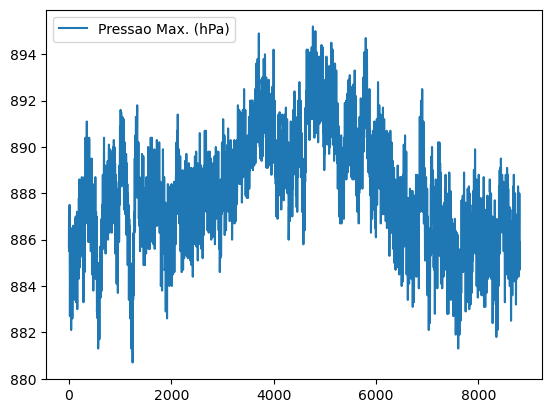

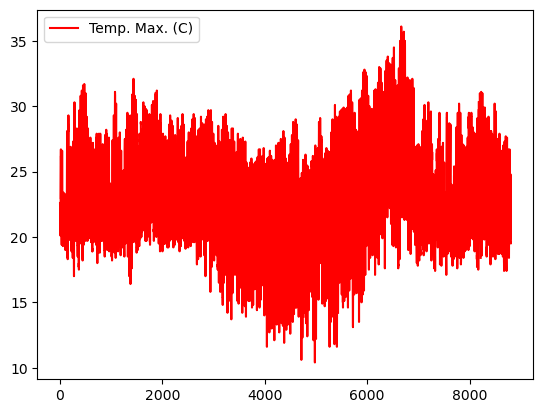

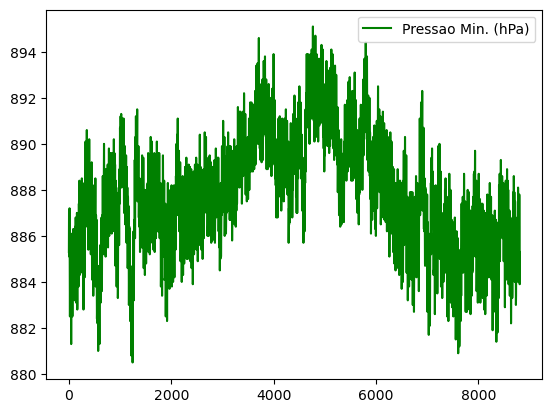

In [3]:
df.plot(kind="line", y="Pressao Max. (hPa)")
df.plot(kind="line", y="Temp. Max. (C)", color="red")
df.plot(kind="line", y="Pressao Min. (hPa)", color="green")

# REGRESSÃO RIDGE
A regressão Ridge trata-se de uma variação da regressão linear, difere da RL por adicionar um termo de regularização para evitar problemas como overfitting (sobreajuste) e melhorar a generalização do modelo. Ela é particularmente útil quando tens muitas variáveis preditoras e/ou multicolinearidade entre elas.